Visualize a single gel by plotting its 2D projections

In [8]:
import sys

sys.path.append("../")

In [9]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from config import Config

In [10]:
def extract_timestep(p: Path) -> int:
    return int(p.stem.split("_")[-1])

def get_pos_files(gel_dir_path: Path, stripe_size: int=1) -> pd.DataFrame:
    all_pos_files = sorted(
        (gel_dir_path / "raw/gel_eq").glob("*.npy"), key=extract_timestep)
    pos_files = all_pos_files[::stripe_size]
    timesteps = [extract_timestep(p) for p in pos_files]
    config = Config.from_file(gel_dir_path / "config.json")
    df = pd.DataFrame({"paths": pos_files, "timestep": timesteps, "box_l": config.initial_box_l})
    df["forcefield"] = config.agent_force_field
    return df

# gel_dir = Path().home() / "data/mmgel/production4/run_1_ff_harmonic_meshw_5.0_charge_0.25"
gel_dir = Path("/Users/r/Documents/work/icp/microgel/code/data/raw/30112024_forcefield_eq_time_fixed/run=0_ff=harmonic_charge=0.05_vf=0.45_crosslink=0.7")
gel_dir.exists()

True

In [11]:
pos_df = get_pos_files(gel_dir, stripe_size=1)
pos_df = pos_df.sort_values(by="timestep")
display(len(pos_df))
display(pos_df.head())

20

,paths,timestep,box_l,forcefield
0,/Users/r/Documents/work/icp/microgel/code/data...,5000,101.4,harmonic
1,/Users/r/Documents/work/icp/microgel/code/data...,10000,101.4,harmonic
2,/Users/r/Documents/work/icp/microgel/code/data...,15000,101.4,harmonic
3,/Users/r/Documents/work/icp/microgel/code/data...,20000,101.4,harmonic
4,/Users/r/Documents/work/icp/microgel/code/data...,25000,101.4,harmonic


In [12]:
from utils.mymath import random_rotation_matrix

def plot_gels(df, step=1, with_box=False):
    g = sns.FacetGrid(
        df, col="timestep", col_wrap=4,
    )
    # g.figure.set_size_inches(12, 6)

    def plot_points(data, color, **kwargs):
        bead_pos = np.load(data["paths"].iloc[0])[::step]
        box_l = data["box_l"].iloc[0]

        ax = plt.gca()
        ax.scatter(*bead_pos[:, :2].T, s=1.0, alpha=1.0)
        if with_box:
            ax.hlines([0, box_l], 0, box_l, color="k")
            ax.vlines([0, box_l], 0, box_l, color="k")
        ax.set_aspect("equal")

    g.map_dataframe(plot_points)
    g.add_legend()
    plt.tight_layout()
    plt.show()

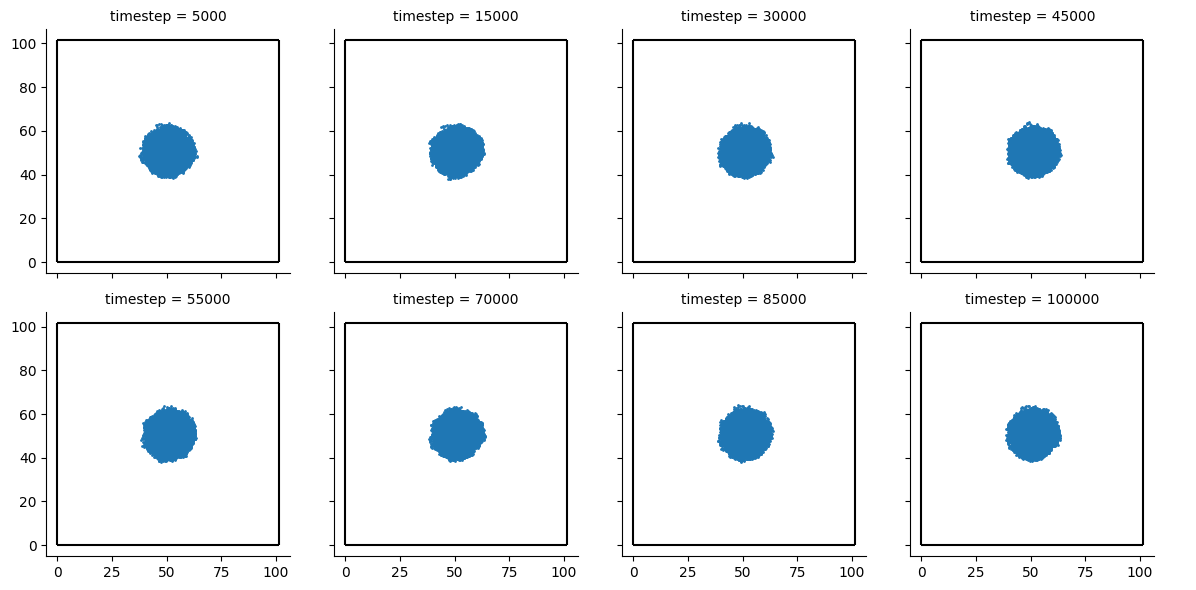

In [13]:
plot_gels(pos_df.iloc[np.linspace(0, len(pos_df)-1, 8, endpoint=True, dtype=int)], with_box=True)

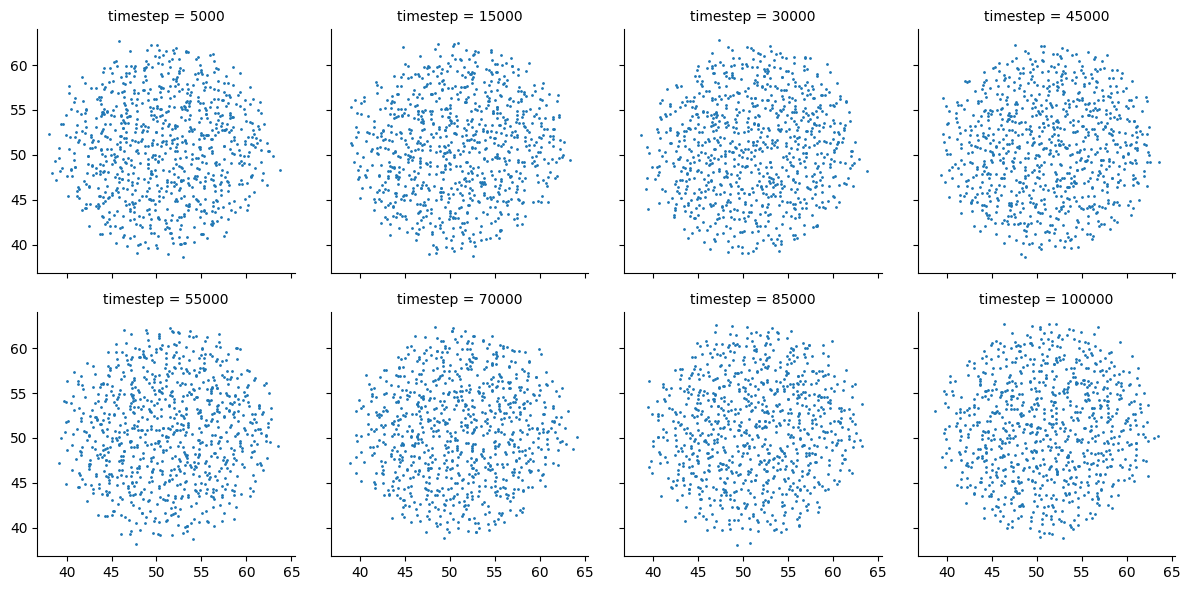

In [14]:
plot_gels(pos_df.iloc[np.linspace(0, len(pos_df)-1, 8, endpoint=True, dtype=int)], step=5, with_box=False)